In [ ]:
BreastCancer

In [9]:
#importing Libraries :)

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [59]:
from sklearn.model_selection import train_test_split

In [12]:
#load dataset

dataset=pd.read_csv("data.csv")

In [14]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
# drop id and unnamed 32

dataset = dataset.drop(['id','Unnamed: 32'],axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
dataset.shape

(569, 31)

In [22]:
pd.isnull(dataset).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [50]:
#mapping function to map different string objects to integer

def mapping(data,feature):
    
    featureMap=dict()
    
    count=0
    
    for i in sorted(data[feature].unique(),reverse=True):
        
        featureMap[i]=count
        
        count=count+1
        
    data[feature]=data[feature].map(featureMap)
    
    return data

In [51]:
dataset=mapping(dataset,feature="diagnosis")

In [53]:
dataset.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
#divide dataset into x(input) and y(output)

X=dataset.drop(["diagnosis"],axis=1)
y=dataset["diagnosis"]

In [60]:
#divide dataset into training set, cross validation set, and test set

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [75]:
#hein?? what is all this??

def getModel(arr):
    
    model=tf.keras.models.Sequential()
    
    for i in range(len(arr)):
        
        if i!=0 and i!=len(arr)-1:
            
            if i==1:
                model.add(tf.keras.layers.Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(tf.keras.layers.Dense(arr[i],activation='relu'))
                
    model.add(tf.keras.layers.Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    
    return model

In [128]:
firstModel=getModel([30,50,1])

In [129]:
firstModel.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 50)                1550      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [114]:
from IPython.display import clear_output

In [115]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

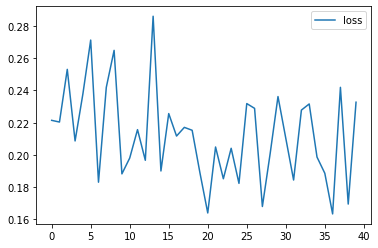

12/12 [==============================] - 1s 56ms/step - loss: 0.2327 - accuracy: 0.9176


In [116]:
firstModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [117]:
scores=firstModel.evaluate(np.array(valX),np.array(valY))

3/3 [==============================] - 0s 2ms/step - loss: 0.1850 - accuracy: 0.9231


In [118]:
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

Loss: 0.18495044112205505
Accuracy 92.30769276618958


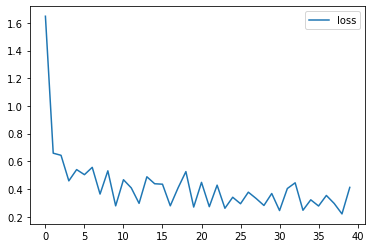

12/12 [==============================] - 0s 32ms/step - loss: 0.4118 - accuracy: 0.8544


In [119]:
secondModel=getModel([30,100,1])
secondModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])

In [120]:
scores2=secondModel.evaluate(np.array(valX),np.array(valY))

3/3 [==============================] - 0s 3ms/step - loss: 0.2151 - accuracy: 0.9231


In [121]:
thirdModel=getModel([30,50,70,40,1])

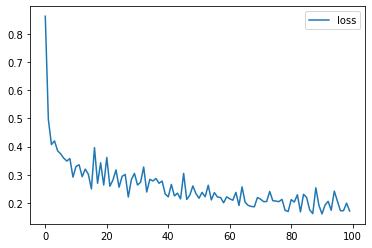

12/12 [==============================] - 0s 36ms/step - loss: 0.1716 - accuracy: 0.9396


In [122]:
thirdModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])

In [123]:
scores3=thirdModel.evaluate(np.array(valX),np.array(valY))

3/3 [==============================] - 0s 11ms/step - loss: 0.2938 - accuracy: 0.9121


In [124]:
print(scores3)

[0.2938346862792969, 0.9120879173278809]


In [125]:
predY=firstModel.predict(np.array(testX))
predY=np.round(predY).astype(int).reshape(1,-1)[0]

In [126]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,testY)
tn, fn, fp, tp=confusion_matrix(predY,testY).ravel()
m=pd.crosstab(predY,testY)
print("Confusion matrix")
print(m)

Confusion matrix
diagnosis   0   1
row_0            
0          39   0
1           4  71


In [127]:
sens=tp/(tp+fn)
spec=tn/(tn+fp)
print("Senstivity:",sens)
print("Specificity:",spec)

Senstivity: 1.0
Specificity: 0.9069767441860465


In [130]:
logs

NameError: name 'logs' is not defined